**Imports:**

In [71]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE 
from collections import Counter
import warnings

# Australia Rain Prediction - Classification

The purpose of this project is to determine if it will be raining tomorrow in Australia.  
Our data was imported from kaggle.com and it contains 145460 rows and 23 columns.  
This data represents a weather samples from 49 different location in Australia.  
The concluding column is whether it will will be raining tomorrow "Yes" or "No".  
Link to the dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package  

### Getting the Data
First we will import the data into the notebook, then we will start working on the data in order to understand the behavior of the data.  
We will try to find some patterns in the data which will allow us to neglect some columns that are irrelevant or that are highly correlated  
with other columns to prevent overfitting. 

In [2]:
# warnings.filterwarnings('ignore')
weather = pd.read_csv('/Users/netan/PycharmProjects/Introduction_To_Data_Science_Project/Data/weatherAUS.csv')
weather.head(7)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No


## Explaning the columns
  * **Date:** The date when this row was taken. Year-Month-Day  
  * **Location:** City/Town of the measurement.
  * **MinTemp/MaxTemp:** The Minimum/Maximum temperature in Celsius measured in that day.
  * **Rainfall:** The amount of rainfall recorded for the day in mm
  * **Evaporation:** The amount of mm that where evaporated in the last 24-hrs (liquids transofrming into gas).
  * **Sunshine:** Bright sunshine hours in the 24 hours to midnight.
  * **WindGustDir:** Direction of strongest gust in the 24 hours to midnight (the unit is 16 compass points).
  * **WindGustSpeed:** Speed of strongest wind gust in the 24 hours to midnight in KPH (kilometres per hour).
  * **WindDir9am/WindDir3pm:** Wind direction averaged over 10 minutes prior to 9-AM/3-PM.
  * **WindSpeed9am/WindSpeed3pm:** Wind speed averaged over 10 minutes prior to 9-AM/3-PM.
  * **Humidity9am/Humidity3pm:** Relative humidity at 9-AM/3-PM.
  * **Pressure9am/Pressure3pm:** Atmospheric pressure reduced to mean sea level at 9-AM/3-PM.
  * **Cloud9am/Cloud3pm:** Fraction of sky obscured by cloud at 9-AM/3-PM (number between 0-8, 0 indicates clear sky 8 indicates cloudy sky).
  * **Temp9am/Temp3pm:** Temperature in Celsius at 9-AM/3-PM.
  * **RainToday:** Yes if it was rainning today No otherwise.
  * **RainTomorrow:** Yes/No if it will be rainning tomorrow - ***this is the target column***.  
  
  
  

## Data Exploring:
Before cleaning the data we need to know and udnerstand the data better.
Then we will start working on the data by the following steps:


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

We can see that the data is divided between two data types: Object and Float64.  
Which in our case implies that we have Strings and Numbers *(because we know we loaded the data from a CSV file then Object can be only String)*.

**We will check how many unique and nulls values the Object type columns contains:**

In [4]:
object_cols = [var for var in weather.columns if weather[var].dtype=='O']
object_nulls = weather[object_cols].isnull().sum()

for var in object_cols:
    print('{} contains:\n  {} unique values.\n  {} null values.\n'.format(var, len(weather[var].unique()), object_nulls[var]))

Date contains:
  3436 unique values.
  0 null values.

Location contains:
  49 unique values.
  0 null values.

WindGustDir contains:
  17 unique values.
  10326 null values.

WindDir9am contains:
  17 unique values.
  10566 null values.

WindDir3pm contains:
  17 unique values.
  4228 null values.

RainToday contains:
  3 unique values.
  3261 null values.

RainTomorrow contains:
  3 unique values.
  3267 null values.



**Lets count all the NaN values:**

In [5]:
missing_vals = pd.DataFrame(weather.isnull().sum(), columns = ['Amount of missing values:'])
missing_vals['Percentage of missing values:']= (missing_vals / len(weather)).round(4) * 100
missing_vals

,Amount of missing values:,Percentage of missing values:
Date,0,0.00
Location,0,0.00
MinTemp,1485,1.02
MaxTemp,1261,0.87
Rainfall,3261,2.24
Evaporation,62790,43.17
Sunshine,69835,48.01
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
WindDir9am,10566,7.26


Later in the project we will handle all the missing values, but now we will delete all the rows with NaN  
values in a category with less then 5% missing data according to what we saw in the table above.

In [6]:
rows_to_delete = ['MinTemp'
, 'MaxTemp'
, 'Rainfall'
, 'WindDir3pm'
, 'WindSpeed9am'
, 'WindSpeed3pm'
, 'Humidity9am'
, 'Humidity3pm'
, 'Temp9am'
, 'Temp3pm'
, 'RainToday'
, 'RainTomorrow']
weather = weather.dropna(subset = rows_to_delete)

The **Date** column datatype is Object so we will transform it to date type for easier handling.

In [7]:
weather['Date'] = pd.to_datetime(weather['Date'])

The **Date** column type is not numeric and we want to convert it to a numeric value.  
We will create 3 more columns:
* day - number between 1-31
* month - numebr between 1-12
* year - number of the year

But there is a major problem with that transformation.   
The problem is that our model will gain wrong conclusions regarding to the value of day/month/year.  
We already know that the weather is affected by the date, i.e chance for rain.  
Our model will think that the value 31 is greater then 1, but actually they are just days so our model can go wrong.  
Which is why we will convert the **Date** to **day and month** columns with numeric values, but the values will be cyclic just like the cycle of the month or year.  
This transformation is made with some math calculations and with the help of two famous functions **Sine** and **Cosine**.

credit to: https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/

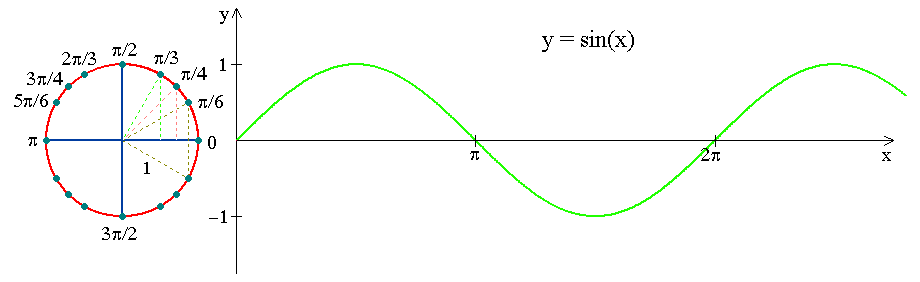

In [8]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

weather['month'] = weather['Date'].dt.month
weather = encode(weather, 'month', 12)

weather['day'] = weather['Date'].dt.day
weather = encode(weather, 'day', 31)

Text(0.5, 1.0, 'Cyclic encoding of Month')

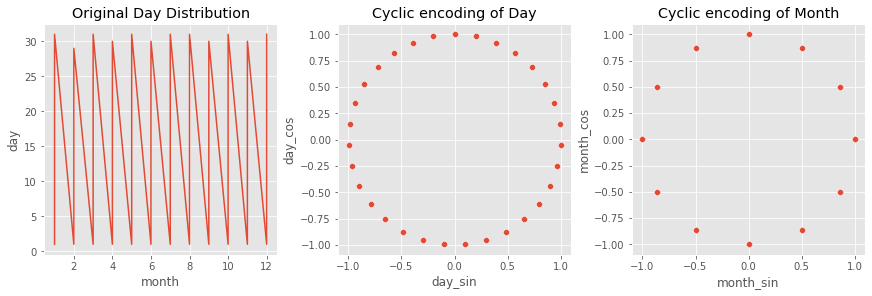

In [9]:
# Let's look at the transformed features

plt.style.use('ggplot')
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (12, 4), constrained_layout = True)

ax1 = sns.lineplot(x = 'month', y = 'day', data = weather, estimator = None, ax=ax1)
ax2 = sns.scatterplot(x = 'day_sin', y = 'day_cos', data = weather, ax = ax2)
ax3 = sns.scatterplot(x = 'month_sin', y = 'month_cos', data = weather, ax = ax3)

ax1.set_title('Original Day Distribution')
ax2.set_title('Cyclic encoding of Day')
ax3.set_title('Cyclic encoding of Month')

The left plot above **Original Day Distribution** represents the original distribution of day and month.  
The middle plot above **Cyclic encoding of Day** represents the cycle of the days with *sin* and *cosine* as x, y.    
The right plot above **Cyclic encoding of Month** represents the cycle of the month with *sin* and *cosine* as x, y.  

Next, we will try to play with the **Location** column, because location is not independent with weather.  
Let's start by trying to gain some knowledge about the location.

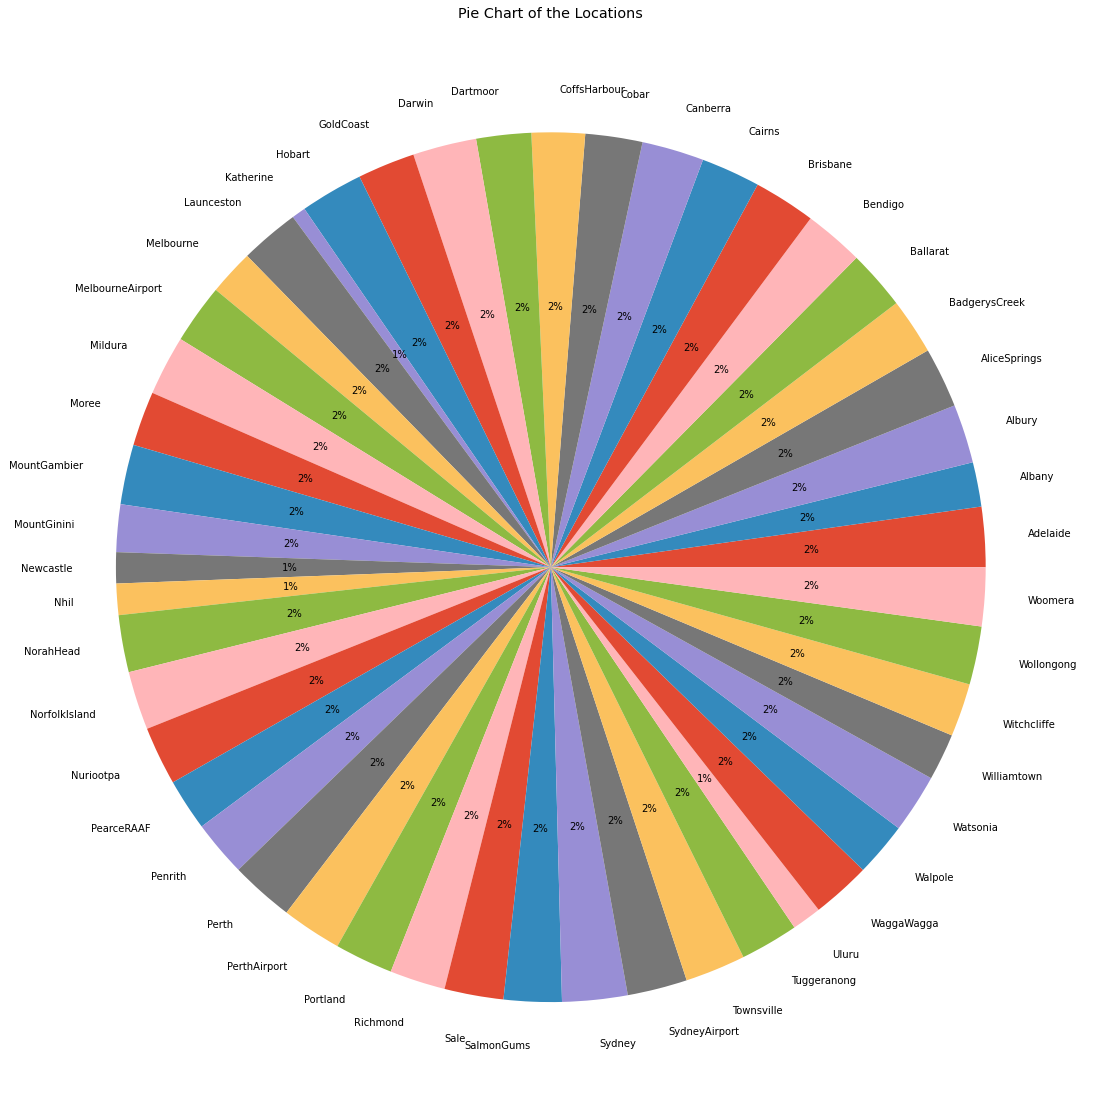

In [10]:
locations = weather.groupby('Location').size()
locations.plot(kind='pie', figsize=(20, 20), autopct='%1.0f%%', title='Pie Chart of the Locations')
plt.ylabel("")
plt.show()

As we can see, preety much most of the towns/cities have the same amount of values in the data, about 2%.   
Australia has 7 states:   
* Northern Territory - **NT**
* Western Australia - **WA**
* Queensland - **QLD**
* New South Wales - **NSW**
* Victoria - **VIC**
* South Australia - **SA**
* Tasmania - **TAS**

So we'll divide the 49 locations into the 7 states, and we'll create a binary column for each state.   
*Note: Australia capital Canberra has it's own state but due to it's location we will count it as NSW*

**Picture of Austrlia states Map**
<div>
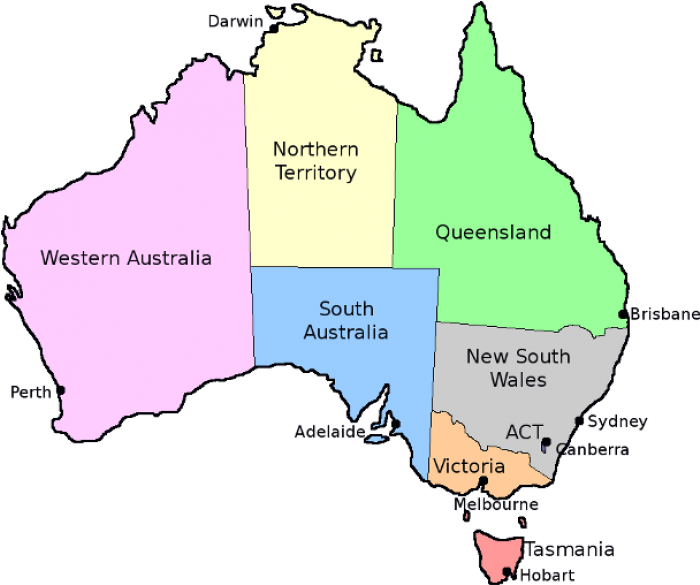
</div>

First, we will create a dictionary that holds state to each town/city.

In [11]:
states_dict = {"Canberra" : "NSW", 
"Sydney" : "NSW", 
"Brisbane": "QLD", 
"Perth" : "WA", 
"Darwin" : "NT", 
"Hobart" : "TAS", 
"Adelaide" : "SA", 
"Melbourne" : "VIC", 
"MountGambier" : "SA", 
"Albury" : "VIC", 
"GoldCoast" : "QLD", 
"Ballarat" : "VIC", 
"Bendigo" : "VIC", 
"Wollongong" : "NSW", 
"Launceston" : "TAS", 
"AliceSprings" : "NT", 
"MountGinini" : "NSW", 
"Cairns" : "QLD", 
"Townsville" : "QLD", 
"Albany" : "WA", 
"Newcastle" : "NSW", 
"Tuggeranong" : "NSW", 
"Penrith" : "NSW", 
"Cobar" : "NSW", 
"PerthAirport" : "WA", 
"Mildura" : "VIC", 
"CoffsHarbour" : "NSW", 
"Watsonia" : "VIC", 
"Moree" : "NSW", 
"Portland" : "VIC", 
"NorfolkIsland" : "DELETE", 
"Witchcliffe" : "WA", 
"Williamtown" : "NSW", 
"Sale" : "VIC", 
"Woomera" : "SA", 
"WaggaWagga" : "NSW", 
"SydneyAirport" : "NSW", 
"BadgerysCreek" : "VIC", 
"MelbourneAirport" : "VIC", 
"Richmond" : "VIC", 
"PearceRAAF" : "WA", 
"Nuriootpa" : "SA", 
"Dartmoor" : "VIC", 
"Walpole" : "WA", 
"NorahHead" : "NSW", 
"SalmonGums" : "WA", 
"Katherine" : "NT", 
"Uluru" : "NT", 
"Nhil" : "VIC"
    }

Second, In the **Location** column we will change the city/town to its state.

In [16]:
def town_to_state(weather):
    for ind in weather.index:
        weather['Location'][ind] = states_dict[weather['Location'][ind]]
        
# town_to_state(weather)
print('DONE!')

DONE!


Now were just confirming that all the values were changed.

In [17]:
print(weather["Location"].value_counts())
print()
print("Sum of all values: ", weather["Location"].value_counts().sum())

NSW       38284
VIC       35847
WA        19252
QLD       11947
SA        11854
NT         8371
TAS        6104
DELETE     2931
Name: Location, dtype: int64

Sum of all values:  134590


Finally, we can create a single column for each state.  
If the value is **1** then this city/town belongs to that specific state, **0** otherwise.

In [18]:
weather['NT'] = weather['Location'] == 'NT'
weather['VIC'] = weather['Location'] == 'VIC'
weather['WA'] = weather['Location'] == 'WA'
weather['QLD'] = weather['Location'] == 'QLD'
weather['SA'] = weather['Location'] == 'SA'
weather['NSW'] = weather['Location'] == 'NSW'
weather['TAS'] = weather['Location'] == 'TAS'

weather['NT'].replace({False : 0, True : 1},inplace = True)
weather['VIC'].replace({False : 0, True : 1},inplace = True)
weather['WA'].replace({False : 0, True : 1},inplace = True)
weather['QLD'].replace({False : 0, True : 1},inplace = True)
weather['SA'].replace({False : 0, True : 1},inplace = True)
weather['NSW'].replace({False : 0, True : 1},inplace = True)
weather['TAS'].replace({False : 0, True : 1},inplace = True)

weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,day,day_sin,day_cos,NT,VIC,WA,QLD,SA,NSW,TAS
0,2008-12-01,VIC,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1,0.201299,0.979530,0,1,0,0,0,0,0
1,2008-12-02,VIC,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,2,0.394356,0.918958,0,1,0,0,0,0,0
2,2008-12-03,VIC,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,3,0.571268,0.820763,0,1,0,0,0,0,0
3,2008-12-04,VIC,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,4,0.724793,0.688967,0,1,0,0,0,0,0
4,2008-12-05,VIC,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,5,0.848644,0.528964,0,1,0,0,0,0,0


When we created the states dictionary for the Location **NorfolkIsland** we put it's state as **DELETE** .  
The reason we did that is because NorfolkIsland is an Island located almost 2000km from Australia and we think that having                     
this data may harm our model because it's not actually in Australia.  
So we chose to remove all the samples that were taken from NorfolkIsland.

In [19]:
weather.drop(weather[(weather['Location'] == 'DELETE')].index, inplace=True)

In [20]:
# Now will be count as 0 and yes will be count as 1.
weather['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

### Splitting the data
Before doing any preprocessing, we will split the data into train and test set.   
The reason for that is, we don't see the test data, so all the preprocessing should be based on the train data.   
If we perform the preprocessing based on test data, it means that we did some cheating which can cause to overfitting.

In [21]:
y = weather["RainTomorrow"]
len(y)

131659

In [22]:
x = weather.drop("RainTomorrow",axis=1)
len(x)

131659

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

### Cleaning the data
**First we will fill the NaN values of all the Object type columns**

In [24]:
obj_col = X_train.select_dtypes(include=['object']).columns
missing_obj_train = X_train[obj_col].isnull().mean() * 100
missing_obj_test = X_test[obj_col].isnull().mean() * 100

print("Train:")
print(missing_obj_train)
print()
print("Test:")
print(missing_obj_test)

Train:
Location       0.000000
WindGustDir    4.552766
WindDir9am     5.746582
WindDir3pm     0.000000
RainToday      0.000000
dtype: float64

Test:
Location       0.000000
WindGustDir    4.445795
WindDir9am     5.585093
WindDir3pm     0.000000
RainToday      0.000000
dtype: float64


Now we need to choose how to fill the empty values with **Mode**, **Mean**, or **Median** .  
**Mean** and **Median** are available only for numerical features.
* **Mode** - The most frequent value that appears.
* **Mean** - The avarage.
* **Median** - Numerical value that at least half of the values are smaller then him and at least half of the values are higher then him.  
  
*If the data has a decent amount of outliers it is not recommended to fill with the **Mean** .*   


Because this columns contains non-numeric values we will use **Mode** to fill the empty spots.

In [25]:
for col in obj_col:
    X_train[col].fillna(X_train[col].mode()[0], inplace = True)
    X_test[col].fillna(X_train[col].mode()[0], inplace = True) # Imputing test data using train data!!
missing_obj_train = X_train[obj_col].isnull().mean() * 100


missing_obj_test = X_test[obj_col].isnull().mean() * 100

# Making sure there is no NaN values.
print("Train:")
print(missing_obj_train)
print()
print("Test:")
print(missing_obj_test)

Train:
Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
dtype: float64

Test:
Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
dtype: float64


**Now we will fill the numerical columns with missing values.**    
Let's check the distribution of the columns with  at least 5% of missing values, we chose to neglect the others.

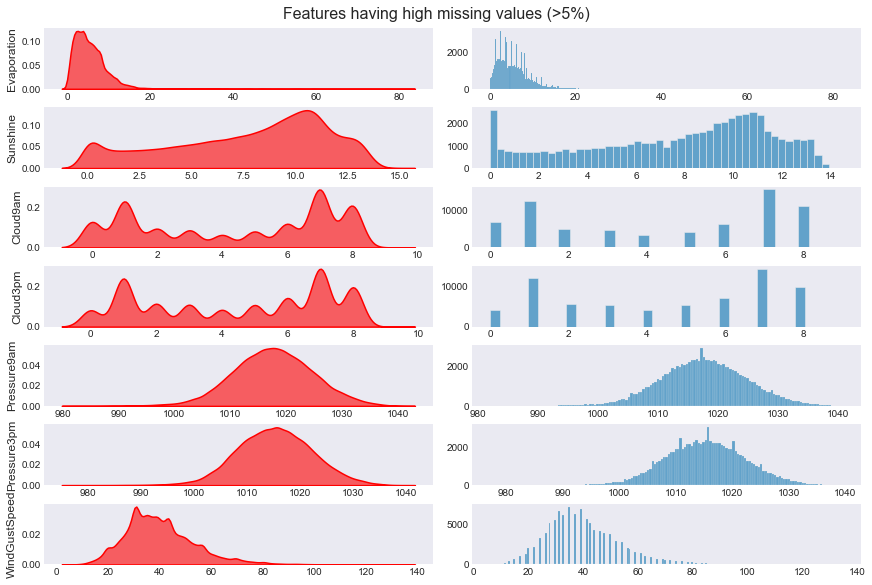

In [26]:
numeric_cols = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Pressure9am', 'Pressure3pm', 'WindGustSpeed']

plt.style.use('seaborn-dark')
fig, ax = plt.subplots(7,2, figsize = (12, 8), constrained_layout = True)

for i, num_var in enumerate(numeric_cols): 
    sns.kdeplot(data = X_train, x = num_var, ax = ax[i][0],
                fill = True, alpha = 0.6, linewidth = 1.5, color='r')
    ax[i][0].set_ylabel(num_var)
    ax[i][0].set_xlabel(None)
    
    sns.histplot(data = X_train, x = num_var, ax = ax[i][1])
    ax[i][1].set_ylabel(None)
    ax[i][1].set_xlabel(None)
    
fig.suptitle('Features having high missing values (>5%)', size = 16);


From the plots above we can see that only Evaporation doesn't have distributed data.  
Which means that we will impute them with their **Median** values and only Evaporation with it's **Mean** value.

In [27]:
for df in [X_train, X_test]:
    for col in numeric_cols:
        if col != 'Evaporation':
            df[col].fillna(X_train[col].median(), inplace = True)
        else:
            df['Evaporation'].fillna(X_train['Evaporation'].mean(), inplace = True)
print("DONE!")

DONE!


Now we will remove the rows of the columns with less than 5% NaN values.

In [28]:
X_train.dropna(inplace = True)
X_test.dropna(inplace = True)
print("DONE!")

DONE!


Final check to see that we filled all the empty blocks.

In [29]:
both = pd.concat([X_train , X_test])
missing_vals = pd.DataFrame(both.isnull().sum(), columns = ['Amount of missing values:'])
missing_vals['Percentage of missing values:']= (missing_vals / len(both)).round(4) * 100
missing_vals

,Amount of missing values:,Percentage of missing values:
Date,0,0.0
Location,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
Evaporation,0,0.0
Sunshine,0,0.0
WindGustDir,0,0.0
WindGustSpeed,0,0.0
WindDir9am,0,0.0


Now we will check to see if some of the categories are correlated with some others.  
we will check only linear correlations to see if we can find some patterns. 

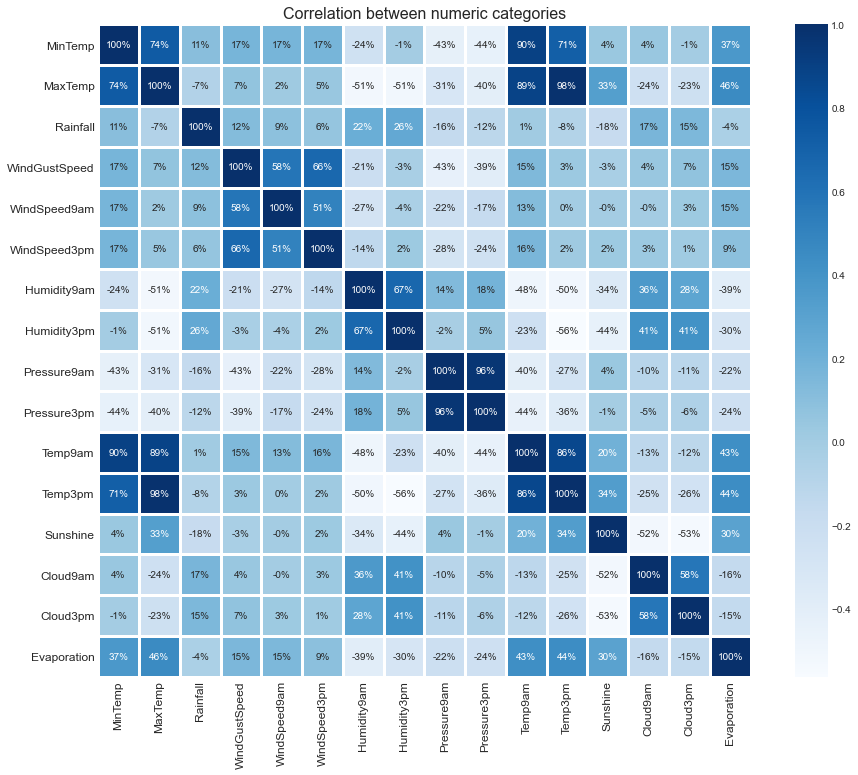

In [30]:
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
               'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
              'Sunshine', 'Cloud9am', 'Cloud3pm', 'Evaporation']
fig=plt.figure(figsize=(16,12))
axis=sns.heatmap(X_train[numeric_cols].corr(), annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")

axis.set_title('Correlation between numeric categories', fontsize=16);
axis.set_xticklabels(numeric_cols, fontsize=12)
axis.set_yticklabels(numeric_cols, fontsize=12, rotation=0);

**We found some strong correlation between:**  
* Temp3pm and MaxTemp
* Pressure3pm and Pressure9am
* Temp9am and MinTemp
* Temp9am and MaxTemp
* Temp3pm and Temp9am


We will remove one from each pair, to avoid multicollinearity.  
But first we will look at theirs scatter.

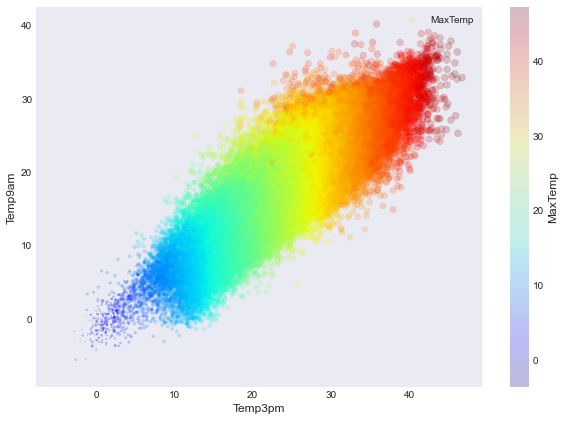

In [32]:
X_train.plot(kind="scatter", x="Temp3pm", y="Temp9am", alpha=0.2,
             s=X_train["MaxTemp"], label="MaxTemp", figsize=(10,7),
             c="MaxTemp", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

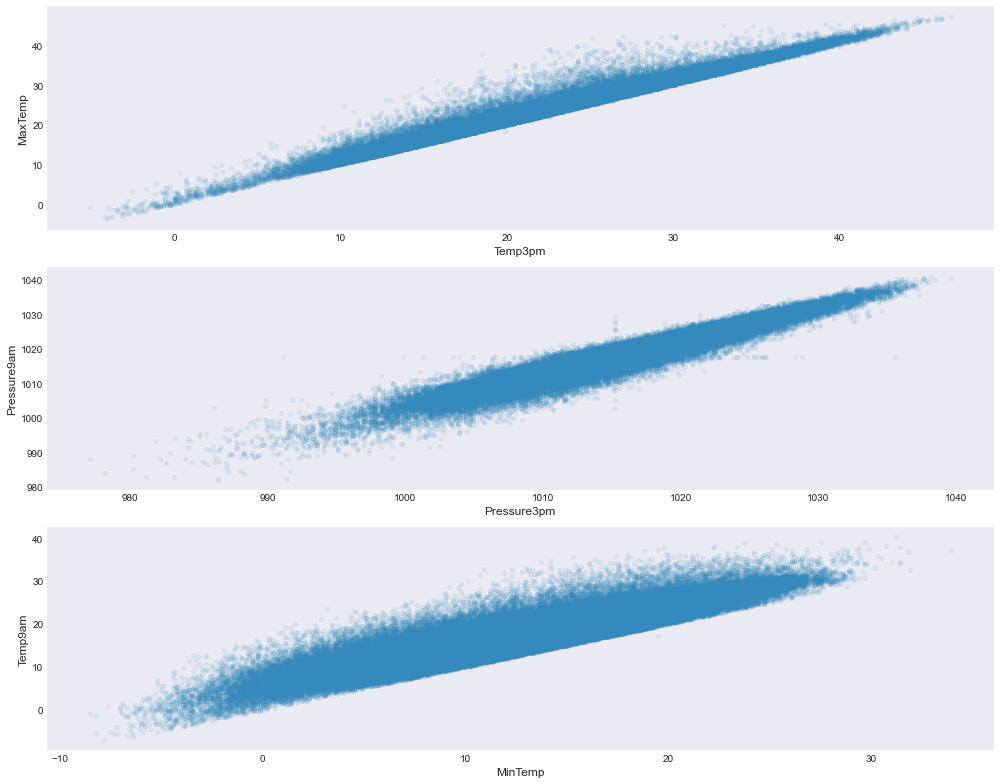

In [44]:
fig, ax = plt.subplots(3, 1, figsize = (14,11), )
((ax1, ax2, ax3)) = ax

X_train.plot(ax=ax1, kind='scatter', x='Temp3pm', y='MaxTemp', alpha = 0.1)
X_train.plot(ax=ax2, kind='scatter', x='Pressure3pm', y='Pressure9am', alpha = 0.1)
X_train.plot(ax=ax3, kind='scatter', x='MinTemp', y='Temp9am', alpha = 0.1)


plt.tight_layout()
plt.show()

As we saw from the correlation matrix and from the plots above there is a high linear  
correlation, so we will remove 
**Temp3pm, Pressure3pm, Temp9am** .

In [45]:
for combined in [X_train, X_test]:
    combined.drop(['Temp3pm', 'Pressure3pm', 'Temp9am'], axis = 1, inplace = True)
print("DONE!")

DONE!


Now we will drop the columns that we transformed already.

In [46]:
for combined in [X_train, X_test]:
    combined.drop(['Location', 'Date', 'day', 'month'], axis = 1, inplace = True)
print("DONE!")

DONE!


Our model can't do math calculations on non-numeric values, so we will convert "YES" to **1** and "NO" to **0** .

In [47]:
X_train['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
X_test['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)

**Checking for imbalance:**

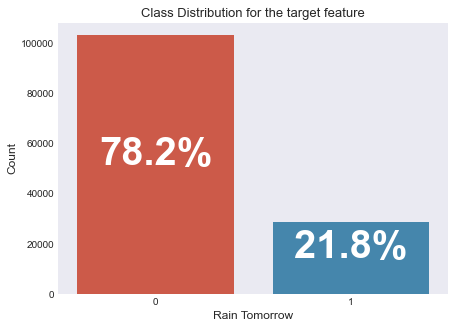

In [48]:
fig = plt.figure(figsize = (7, 5))
axis = sns.countplot(x = 'RainTomorrow', data = weather);
axis.set_title('Class Distribution for the target feature', size = 13);

for patch in axis.patches:
    axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2, 
            s = f"{np.round(patch.get_height()/len(weather)*100, 1)}%", 
            ha = 'center', size = 40, rotation = 0, weight = 'bold' ,color = 'white')
    
axis.set_xlabel('Rain Tomorrow', size = 12)
axis.set_ylabel('Count', size = 12);

We found that only **21.8%** samples from our training set are days that actually had rain on the RainTomorrow column.  
This suggests that we might have a good accuracy in our model but because there are only 21.8% times that our model can predict and say **YES** if our model will keep predict **NO** all the time we will have high accuracy. But that's not true at all.  
*Like the bomb model that we saw in the class*

Now we will transform the remaining non-numeric columns to a numeric values using the get_dummies from Pandas library.

In [55]:
X_train = pd.get_dummies(X_train, columns=['WindDir9am', 'WindDir3pm', 'WindGustDir'])
X_test = pd.get_dummies(X_test, columns=['WindDir9am', 'WindDir3pm', 'WindGustDir'])

Our final step before starting to work on the model is to repair the imbalance we have on the data.

In [57]:
sm = SMOTE(random_state = 37)
temp = y_train
X_train, y_train = sm.fit_resample(X_train, y_train)

print("Before {}".format(Counter(temp)))
print("After {}".format(Counter(y_train)))

Before Counter({0: 87522, 1: 87522})
After Counter({0: 87522, 1: 87522})


### Scaling the data
There are two ways of scalling the data:
* min max Normalization,    y = (x – min) / (max – min)
* Standardization,       y = (x – mean) / standard_deviation

The reason we are doing scaling to our data is that each feature will have the same impact on our model.  
We chose the Min-Max method because there isn't a significant amount of outliers in our data.  


In [58]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train= min_max_scaler.transform(X_train)
X_test= min_max_scaler.transform(X_test)

# Models


### Dummy Classifier

In [59]:
dummyModel = DummyClassifier(strategy="stratified")
dummyModel.fit(X_train, y_train)
predictionsDummy = dummyModel.predict(X_test)

accuracyDummy = metrics.accuracy_score(y_test, predictionsDummy)
accuracyDummy

0.5021520076965922

### Logicstic Regression


In [60]:
modelLogReg = LogisticRegression(max_iter=500)
modelLogReg.fit(X_train, y_train)


max_index = 1 #saving the index of the highest score
max_score = 0 #saving the value of the highest score
# for i in range(2,20):
#     accuracy = cross_val_score(modelLogReg, X_train, y_train, cv = i).mean()
#     if (accuracy > max_score):
#         max_index = i
#         max_score = accuracy
# print('Best index:', maxi, "\ncross_val_score of index", max_index, ':', max_score)

# We already tried and the best index is 11.
accuracy = cross_val_score(modelLogReg, X_train, y_train, cv = 11).mean()
max_index = 11
max_score = accuracy
print('Best index:', max_index, "\ncross_val_score of index", max_index, ':', max_score)

Best index: 11 
cross_val_score of index 11 : 0.8925595151577795


### K Nearest Neighbors - KNN

In [61]:
modelKNN = KNeighborsClassifier(weights='distance')
modelKNN.fit(X_train, y_train)

max_index = 1 #saving the index of the highest score
max_score = 0 #saving the value of the highest score
# for i in range(2,20):
#     accuracy = cross_val_score(modelKNN, X_train, y_train, cv = i).mean()
#     if (accuracy > max_score):
#         max_index = i
#         max_score = accuracy
# print('Best index:', maxi, "\ncross_val_score of index", max_index, ':', max_score)

accuracy = cross_val_score(modelKNN, X_train, y_train, cv = 12).mean()
print("Best index: 12\n", accuracy)

Best index: 12
 0.8619432828317452


### Random Forest Classifier

In [65]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)

accuracy = cross_val_score(RandomForest, X_train, y_train, cv = 5).mean()

print('RandomForestClassifier cross_val_score =', accuracy)

RandomForestClassifier cross_val_score = 0.8979916841571634


We need to find the **best** fold for cross validation.

In [66]:
maxi = 1 #saving the index of the highest score
max = 0 #saving the value of the highest score
# for i in range(6,15):
#     accuracy = cross_val_score(RandomForest, X_train, y_train, cv = i).mean()
#     if (accuracy > max):
#         maxi = i
#         max = accuracy
# print('Best index:', maxi, "\ncross_val_score of index", maxi, ':', max)

# We already tried and the best index is 14.
accuracy = cross_val_score(RandomForest, X_train, y_train, cv = 14).mean()
print('Best index:', 14, "\ncross_val_score of index", 14, ':', accuracy)

Best index: 14 
cross_val_score of index 14 : 0.9107725685000211


**Fine tuning the random forest model using random GridSearch.**  
First we will choose the parameters for the GridSearch.

In [84]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


**Now we will use the random grid to search for best hyperparameters.**   
Random search of parameters, using 14 fold cross validation because we got the best score at our   
former search, 
search across 100 different combinations, and use all available cores

In [59]:
# First create the base model to tune
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 14, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 14 folds for each of 100 candidates, totalling 1400 fits


RandomizedSearchCV(cv=14, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

**By using "rf_random.best_params_" we get the best hyperparameters that we found:**  

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

**Now we will choose the best hyperparameters that we found and create another Random Forest Classifier.**

In [ ]:
# best_random = rf_random.best_estimator_
best_random = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', bootstrap = False)
best_random.fit(X_train, y_train)


print('Best RandomForestClassifier cross_val_score =', cross_val_score(best_random, X_train, y_train, cv = 14).mean())



In [ ]:
 best_random = rf_random.best_estimator_
best_random = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', bootstrap = True)
best_random.fit(X_train, y_train)


print('Best RandomForestClassifier cross_val_score =', cross_val_score(best_random, X_train, y_train, cv = 14).mean())



In [ ]:
## ADD PICTURE OF F1

In [80]:

predictionsRF = best_random.predict(X_test)

conf = confusion_matrix(y_test, predictionsRF)
print("F1 score for Random Forest is :", f1_score(y_test, predictionsRF,) * 100, "%")

F1 score for Random Forest is : 65.29831718510964 %


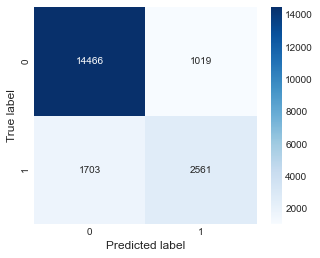

In [81]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsRF), cmap = "Blues", annot=True, fmt = '.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Final score for each Model

In [79]:
print('Logistic Regression  score is: ', modelLogReg.score(X_test, y_test),'.\n')

print('KNN score is: ', modelKNN.score(X_test, y_test),'.\n')

print('RandomForestClassifier score is: ', RandomForest.score(X_test, y_test),'.\n')

print('Best RandomForestClassifier score is: {}.'.format(best_random.score(X_test, y_test)))

Logistic Regression  score is:  0.8536128411565143 .

KNN score is:  0.7936604385032153 .

RandomForestClassifier score is:  0.8627272266950226 .

Best RandomForestClassifier score is: 0.8621702364676692.


## Conclusion:
* Most of our work was on the data itself, we tried as best to do high resarch and understanding the data in order to gain knowledge of the best way to predict whether it will be rain tomorrow.
* We used 3 models and find that the best score we got was with the Random Forest Classifier.
* After Fine tuning with GridSearchCV we got the best result with the Random Forest Classifier with the accuracy score of **86.217%** and F1 score of **65.298%**
